In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import time


catapum = False

dataset = "fashion_mnist"  #  "mnist" or "fashion_mnist"
n_epochs = 100  # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset
filters = 1     # Number of filters
system = "q"    # "q" = quantum, "c" = classic
fixed = False   # False = Variational, True = Fixed
preprocess = False  # Are images preprocesed?
# posible sizes (2,2), (4,4), (6,5)
filter_size_h = 2
filter_size_v = 2

optimizer1 = keras.optimizers.Adam()
optimizer2 = keras.optimizers.Adam()

In [2]:


np.random.seed(23)           # Seed for NumPy random number generator
tf.random.set_seed(23)       # Seed for TensorFlow random number generator

wires = filter_size_h * filter_size_v

def scalar_product(phi, params):
    if system == "q":
        return scalar_prod(phi, params)
    else:
        return scalar_prod1(phi, params)

if dataset == "mnist":
    mnist_dataset = keras.datasets.mnist
else:
    mnist_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

    # Reduce dataset size
train_images = train_images[:n_train]
train_labels = tf.convert_to_tensor(train_labels[:n_train])
test_images = test_images[:n_test]
test_labels = tf.convert_to_tensor(test_labels[:n_test])

    # Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

    # Add extra dimension for convolution channels
train_images = tf.convert_to_tensor(train_images[..., tf.newaxis])
test_images = tf.convert_to_tensor(test_images[..., tf.newaxis])

def quanv(image, params, filters = 1):
        
        if filter_size_h == 2:
            out = tf.zeros((14, 14, filters))
            # Loop over the coordinates of the top-left pixel of 2X2 squares
            I = []
            for i in range(filters):
                J = []
                for j in range(0, 28, 2):
                    K = []
                    for k in range(0, 28, 2):
                        # Process a squared 2x2 region of the image with a quantum circuit

                        q_results = scalar_product(
                            tf.convert_to_tensor([
                                image[j, k, 0],
                                image[j, k + 1, 0],
                                image[j + 1, k, 0],
                                image[j + 1, k + 1, 0]
                            ]), params[i]
                        )
                        # Assign expectation values to different channels of the output pixel (j/2, k/2)
                        #relu
                        if q_results > 0:
                            K.append(q_results)
                        else:
                            K.append(0)
                    J.append(K)
                I.append(J)
            return tf.convert_to_tensor(I)
       
        
        elif filter_size_h == 4:
            out = tf.zeros((7, 7, filters))
            # Loop over the coordinates of the top-left pixel of 2X2 squares
            I = []
            for i in range(filters):
                J = []
                for j in range(0, 28, 4):
                    K = []
                    for k in range(0, 28, 4):
                        # Process a squared 2x2 region of the image with a quantum circuit

                        q_results = scalar_product(
                            tf.convert_to_tensor([
                                image[j, k, 0],
                                image[j, k + 1, 0],
                                image[j, k + 2, 0],
                                image[j, k + 3, 0],
                                image[j+1, k, 0],
                                image[j+1, k + 1, 0],
                                image[j+1, k + 2, 0],
                                image[j+1, k + 3, 0],
                                image[j+2, k, 0],
                                image[j+2, k + 1, 0],
                                image[j+2, k + 2, 0],
                                image[j+2, k + 3, 0],
                                image[j+3, k, 0],
                                image[j+3, k + 1, 0],
                                image[j+3, k + 2, 0],
                                image[j+3, k + 3, 0],
                                
                               
                            ]), params[i]
                        )
                        # Assign expectation values to different channels of the output pixel (j/2, k/2)
                        #relu
                        if q_results > 0:
                            K.append(q_results)
                        else:
                            K.append(0)
                    J.append(K)
                I.append(J)
            return tf.convert_to_tensor(I)
        
        elif filter_size_h == 6:
            out = tf.zeros((6, 4, filters))
            # Loop over the coordinates of the top-left pixel of 2X2 squares
            I = []
            for i in range(filters):
                J = []
                for j in range(0, 28-6, 6):
                    K = []
                    for k in range(0, 28-5, 5):
                        # Process a squared 2x2 region of the image with a quantum circuit

                        #print(j,k)
                        q_results = scalar_product(
                            tf.convert_to_tensor([

                                image[j, k, 0],
                                image[j, k + 1, 0],
                                image[j, k + 2, 0],
                                image[j, k + 3, 0],
                                image[j, k + 4, 0],
                                
                                image[j+1, k, 0],
                                image[j+1, k + 1, 0],
                                image[j+1, k + 2, 0],
                                image[j+1, k + 3, 0],
                                image[j+1, k + 4, 0],
                                
                                image[j+2, k, 0],
                                image[j+2, k + 1, 0],
                                image[j+2, k + 2, 0],
                                image[j+2, k + 3, 0],
                                image[j+2, k + 4, 0],
                                
                                image[j+3, k, 0],
                                image[j+3, k + 1, 0],
                                image[j+3, k + 2, 0],
                                image[j+3, k + 3, 0],
                                image[j+3, k + 4, 0],
                                
                                image[j+4, k, 0],
                                image[j+4, k + 1, 0],
                                image[j+4, k + 2, 0],
                                image[j+4, k + 3, 0],
                                image[j+4, k + 4, 0],
                                
                                image[j+5, k, 0],
                                image[j+5, k + 1, 0],
                                image[j+5, k + 2, 0],
                                image[j+5, k + 3, 0],
                                image[j+5, k + 4, 0],
                                
                               
                            ]), params[i]
                        )
                        # Assign expectation values to different channels of the output pixel (j/2, k/2)
                        #relu
                        if q_results > 0:
                            K.append(q_results)
                        else:
                            K.append(0)
                    J.append(K)
                I.append(J)
            return tf.convert_to_tensor(I)
        
        
def scalar_prod1(phi, params): #Classical

        sol = 0
        
        for i,j in zip(phi,params[0]):
            sol += i * j
            
        return sol
    
def scalar_prod(phi, params): ##Quantum 

        prob = circuit(phi,params)
        return prob[0] - prob[1]
    
    #Here dev_local


   
    #Here dev_amazon_braket
'''
my_bucket = f"amazon-braket-cch-quantvolution" # the name of the bucket
my_prefix = "qfilter10_16_qubits" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)
device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"
    
dev_amazon_braket = qml.device(
  "braket.aws.qubit",
device_arn=device_arn,
wires=wires,
shots =250,
s3_destination_folder=s3_folder,
max_parallel = 30
parallel=True,
)'''
    #dev_amazon_braket = qml.device("braket.local.qubit", wires=wires)
    
dev_local = qml.device("default.qubit", wires=wires + 1)
#dev_local = qml.device("braket.local.qubit", wires=wires + 1)

@qml.qnode(dev_local, interface = "tf")
def circuit(phi, params):

        qml.Hadamard(wires)
        # Encoding of 4 classical input values
        for j in range(wires):
            qml.CRY(-np.pi * phi[j], wires=[wires,j])

        for layer in range(params.shape[0]):
            for i in range(params.shape[1]):
                qml.CRX(np.pi * params[layer,i], wires = [wires,i])
                qml.Toffoli(wires = [wires, i, (i+1)%(wires)])
                qml.CRY(np.pi * params[layer,i], wires = [wires,i])

                
        qml.Hadamard(wires)
        return qml.probs(wires = wires)
    

    

layers = n_layers
out_h1 = 10
    
if not catapum:
    
        params = tf.Variable(tf.random.uniform([filters,layers, wires], dtype = tf.float64))
        W1 = tf.Variable(tf.random.uniform([(28 // filter_size_v)* (28 // filter_size_h) * filters, out_h1], dtype = tf.float64))
        b1 = tf.Variable(tf.random.uniform([out_h1,], dtype = tf.float64))

        losses = []
        accuracies = []
        np.save("losses_HTest_fixed.npy", np.array(losses))
        np.save("accuracies_HTest_fixed.npy", np.array(accuracies))
        np.save("W1_HTest_fixed.npy", W1.numpy())
        np.save("b1_HTest_fixed.npy", b1.numpy())
        np.save("params_HTest_fixed.npy", params.numpy())
    
def x_hidden(x,W,b):
        x = tf.cast(x, dtype = tf.float64)
        sol = tf.nn.softmax(x @ W + b)
        return sol
    
def to_vector(n):
        L = [0] * 10
        L[n] = 1
        return tf.cast(tf.convert_to_tensor(L), dtype = tf.float64)

def accuracy():
        correct = 0
        for j in range(n_test):

            if not fixed:
                image = tf.reshape(quanv(test_images[j], params, filters),[1,-1])
            else:
                image = pre_process_test[j]
            o1 = x_hidden(image,W1,b1)

            if tf.math.argmax(o1[0]) == tf.cast(test_labels[j], dtype = tf.int64):
                correct += 1
        return correct / n_test
    

losses =  list(np.load("losses_HTest_fixed.npy", allow_pickle=True)) 
accuracies =  list(np.load("accuracies_HTest_fixed.npy", allow_pickle=True))
    
W1 =  tf.Variable(np.load("W1_HTest_fixed.npy", allow_pickle=True))
b1 =  tf.Variable(np.load("b1_HTest_fixed.npy", allow_pickle=True))


if preprocess == False and fixed == True:
    
    pre_process_train = []
    pre_process_test = []
    
    print("train:")
    for i in range(n_train):
        print(f"{i}/{n_train}")
        pre_process_train.append(tf.reshape(quanv(train_images[i], params, filters),[1,-1]))
        
    print("test:")
    for i in range(n_test):
        print(f"{i}/{n_test}")
        pre_process_test.append(tf.reshape(quanv(test_images[i], params, filters),[1,-1]))


start = time.time()
opt1 = optimizer1
opt2 = optimizer2
for i in range(n_epochs):
        epoch_loss = 0
        for j in range(n_train):
            with tf.GradientTape(persistent=True) as tape:
                if not fixed:
                    image = tf.reshape(quanv(train_images[j], params, filters),[1,-1])
                else:
                    image = pre_process_train[j]
                    
                o1 = x_hidden(image,W1,b1)
                label = tf.reshape(train_labels[j] , o1.shape[0])
                loss = tf.keras.losses.sparse_categorical_crossentropy(label[0], o1) 
                epoch_loss += loss
                print(j," ",loss)
                print("Current Time(s) after loss plus previous gradient: ", time.time()-start)

            gradients = tape.gradient(loss, [W1,b1])
            opt1.apply_gradients(zip(gradients, [W1, b1]))
            
            if not fixed:
                gradients = tape.gradient(loss, [params])
                opt2.apply_gradients(zip(gradients, [params]))
                np.save("params_HTest.npy", params.numpy())

            np.save("W1_HTest_fixed.npy", W1.numpy())
            np.save("b1_HTest_fixed.npy", b1.numpy())
        
        losses.append(epoch_loss[0].numpy())  
        ac = accuracy()
        accuracies.append(ac)
        np.save("losses_HTest_fixed.npy", np.array(losses))
        np.save("accuracies_HTest_fixed.npy", np.array(accuracies))
        print("Epoch {}; loss: {} accuracy: {}".format(i,epoch_loss,ac))
        print("Current Time(s): ", time.time()-start)

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


0   tf.Tensor([1.8489139], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4.639591932296753
1   tf.Tensor([2.36161583], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  15.392266035079956
2   tf.Tensor([2.49954663], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25.9724760055542
3   tf.Tensor([3.1562401], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36.616620779037476
4   tf.Tensor([2.11165684], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  47.337363958358765
5   tf.Tensor([3.32578421], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  58.19335675239563
6   tf.Tensor([3.28683145], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  68.0015697479248
7   tf.Tensor([3.69498001], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  78.45176601409912
8

15   tf.Tensor([1.62059437], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1798.2263760566711
16   tf.Tensor([2.58611626], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1810.3479628562927
17   tf.Tensor([1.79928553], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1822.5333888530731
18   tf.Tensor([2.4161761], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1835.0335719585419
19   tf.Tensor([2.3724243], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1846.915974855423
20   tf.Tensor([3.1031535], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1857.0012319087982
21   tf.Tensor([2.40992393], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1869.3118999004364
22   tf.Tensor([2.55708982], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1881.87

30   tf.Tensor([1.95270682], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  2621.115602016449
31   tf.Tensor([2.60903633], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  2631.0693430900574
32   tf.Tensor([2.24322382], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  2640.3491537570953
33   tf.Tensor([2.22737661], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  2649.8696999549866
34   tf.Tensor([1.84496463], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  2660.514158964157
35   tf.Tensor([2.57925655], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  2669.767128944397
36   tf.Tensor([2.13722304], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  2678.237406015396
37   tf.Tensor([2.92374889], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  2687.39

45   tf.Tensor([2.58430581], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  3493.760226726532
46   tf.Tensor([2.49354607], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  3505.604057788849
47   tf.Tensor([2.84047078], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  3519.279326915741
48   tf.Tensor([1.84778976], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  3534.4502589702606
49   tf.Tensor([2.58602085], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  3547.9444768428802
Epoch 3; loss: [114.63777332] accuracy: 0.2
Current Time(s):  3695.3023068904877
0   tf.Tensor([1.88697627], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  3700.673737049103
1   tf.Tensor([1.87926408], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  3714.9341158866882
2   tf.Tensor([2.07201493], shape=(1

9   tf.Tensor([1.82036634], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4569.510959863663
10   tf.Tensor([1.72080126], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4583.15496301651
11   tf.Tensor([2.01694104], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4596.092151880264
12   tf.Tensor([2.3377985], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4609.285866975784
13   tf.Tensor([1.91951274], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4620.641006946564
14   tf.Tensor([2.45907258], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4633.047369003296
15   tf.Tensor([1.76582272], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4645.634701728821
16   tf.Tensor([2.58068709], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  4658.74114680

24   tf.Tensor([2.50868936], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  5500.244312763214
25   tf.Tensor([2.2562372], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  5512.626312971115
26   tf.Tensor([1.79895054], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  5524.250860929489
27   tf.Tensor([2.52785507], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  5533.852468967438
28   tf.Tensor([2.06843723], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  5545.678663015366
29   tf.Tensor([2.36489033], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  5554.704263925552
30   tf.Tensor([1.85337095], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  5566.526206970215
31   tf.Tensor([2.2246103], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  5577.6371879

39   tf.Tensor([2.42087844], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  6379.447697877884
40   tf.Tensor([2.27262959], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  6393.228008031845
41   tf.Tensor([2.48815077], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  6406.1745228767395
42   tf.Tensor([2.00599894], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  6419.111526012421
43   tf.Tensor([1.88312318], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  6431.712379932404
44   tf.Tensor([2.18178816], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  6443.414341926575
45   tf.Tensor([2.42798536], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  6455.763144016266
46   tf.Tensor([2.26554748], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  6465.9335

3   tf.Tensor([2.2188486], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  7340.762557983398
4   tf.Tensor([1.69500581], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  7349.915236949921
5   tf.Tensor([2.34308457], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  7361.662544965744
6   tf.Tensor([2.38311648], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  7372.32573890686
7   tf.Tensor([2.59644404], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  7383.767790794373
8   tf.Tensor([1.47918678], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  7395.192499876022
9   tf.Tensor([1.6049109], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  7406.403685808182
10   tf.Tensor([1.61284307], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  7417.783470869064
11

18   tf.Tensor([2.2260348], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8155.323099851608
19   tf.Tensor([2.29014823], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8166.4141619205475
20   tf.Tensor([1.98227226], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8177.455406904221
21   tf.Tensor([2.57088849], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8189.164396762848
22   tf.Tensor([2.3399712], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8201.062831878662
23   tf.Tensor([2.40623763], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8211.415573120117
24   tf.Tensor([2.5034719], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8220.811680793762
25   tf.Tensor([1.92791184], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8232.4826328

33   tf.Tensor([2.29508138], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8983.53582072258
34   tf.Tensor([1.67285752], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  8995.6951110363
35   tf.Tensor([2.84461092], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9008.464357852936
36   tf.Tensor([1.91835396], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9018.509373903275
37   tf.Tensor([2.62415248], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9028.309644699097
38   tf.Tensor([2.60995964], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9035.732215881348
39   tf.Tensor([2.35409742], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9046.998813867569
40   tf.Tensor([2.18033104], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9058.20527696

48   tf.Tensor([1.56322036], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9766.376301765442
49   tf.Tensor([1.80936049], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9776.973288059235
Epoch 12; loss: [100.90451483] accuracy: 0.2
Current Time(s):  9888.54655790329
0   tf.Tensor([1.99587446], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9892.834144830704
1   tf.Tensor([1.64920587], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9903.164193868637
2   tf.Tensor([1.93615627], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9913.531997919083
3   tf.Tensor([2.03627015], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9922.576672792435
4   tf.Tensor([1.65170854], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  9931.231400966644
5   tf.Tensor([2.13646011], shape=(1,), dty

12   tf.Tensor([1.86020979], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  10645.530035972595
13   tf.Tensor([1.28712052], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  10655.170466899872
14   tf.Tensor([1.95044621], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  10665.415008068085
15   tf.Tensor([1.66170781], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  10675.409919023514
16   tf.Tensor([2.79587349], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  10685.864284992218
17   tf.Tensor([1.5941947], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  10696.558423757553
18   tf.Tensor([2.13217381], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  10707.222692966461
19   tf.Tensor([2.33063567], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1071

27   tf.Tensor([2.12309207], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  11413.777395963669
28   tf.Tensor([1.69673314], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  11424.871454000473
29   tf.Tensor([2.08178714], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  11434.208714962006
30   tf.Tensor([1.37358859], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  11445.63585782051
31   tf.Tensor([1.60776761], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  11456.294076919556
32   tf.Tensor([1.82148555], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  11466.002854824066
33   tf.Tensor([2.43594409], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  11476.209263801575
34   tf.Tensor([1.59188364], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  1148

42   tf.Tensor([1.86822952], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  12217.992183923721
43   tf.Tensor([1.2488671], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  12228.928977012634
44   tf.Tensor([2.06861584], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  12239.866074800491
45   tf.Tensor([2.08648244], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  12250.449575901031
46   tf.Tensor([1.32365319], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  12260.072708845139
47   tf.Tensor([1.83123139], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  12270.987844944
48   tf.Tensor([1.32296666], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  12282.455348014832
49   tf.Tensor([1.66250707], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  12293.1

6   tf.Tensor([1.45100259], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13135.694316864014
7   tf.Tensor([2.3339145], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13146.474368095398
8   tf.Tensor([0.85665114], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13157.921687841415
9   tf.Tensor([0.95609227], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13169.631519079208
10   tf.Tensor([1.15544749], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13181.382661819458
11   tf.Tensor([1.76472953], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13193.150259017944
12   tf.Tensor([1.63031454], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13204.754966020584
13   tf.Tensor([1.02339706], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13216.18

20   tf.Tensor([1.5939724], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13955.159316062927
21   tf.Tensor([2.4600424], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13967.740550994873
22   tf.Tensor([1.76649221], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13979.185172080994
23   tf.Tensor([1.67857452], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  13989.988593816757
24   tf.Tensor([1.98100991], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14000.330561876297
25   tf.Tensor([1.7489297], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14012.834794044495
26   tf.Tensor([0.85591298], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14024.135082960129
27   tf.Tensor([1.8180289], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14033.6

34   tf.Tensor([1.51533375], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14744.392019987106
35   tf.Tensor([2.35964583], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14755.520198822021
36   tf.Tensor([1.5942632], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14765.878249883652
37   tf.Tensor([2.2216073], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14775.609798908234
38   tf.Tensor([2.37111126], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14786.294969797134
39   tf.Tensor([1.83344387], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14797.238343000412
40   tf.Tensor([1.6688397], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14807.951940774918
41   tf.Tensor([1.40426379], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  14818.

49   tf.Tensor([1.43795437], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  15539.37442111969
Epoch 21; loss: [77.70287575] accuracy: 0.36666666666666664
Current Time(s):  15662.362445831299
0   tf.Tensor([1.60318511], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  15666.576090812683
1   tf.Tensor([1.17610229], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  15677.515435695648
2   tf.Tensor([1.69394625], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  15688.68053984642
3   tf.Tensor([1.66444835], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  15700.93182182312
4   tf.Tensor([1.33551458], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  15711.67073392868
5   tf.Tensor([1.47025781], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  15724.487873077393
6   tf.Tensor([1.1096536

13   tf.Tensor([0.86211728], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  16484.744256973267
14   tf.Tensor([1.09890386], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  16496.456785917282
15   tf.Tensor([1.13318205], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  16507.604613780975
16   tf.Tensor([2.56609171], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  16518.964186906815
17   tf.Tensor([1.1958217], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  16529.519984960556
18   tf.Tensor([1.82827576], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  16540.230037927628
19   tf.Tensor([2.31272203], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  16550.3148958683
20   tf.Tensor([1.43539642], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  16561.

28   tf.Tensor([1.09762046], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  17331.651894807816
29   tf.Tensor([1.42200082], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  17341.919600963593
30   tf.Tensor([1.05992316], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  17353.08809876442
31   tf.Tensor([1.15822325], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  17364.838350772858
32   tf.Tensor([1.4717521], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  17375.704635858536
33   tf.Tensor([2.57963501], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  17386.577795743942
34   tf.Tensor([1.46636422], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  17399.594763040543
35   tf.Tensor([1.95097375], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  17412

43   tf.Tensor([0.89653839], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  18147.934327840805
44   tf.Tensor([1.57016056], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  18158.39104795456
45   tf.Tensor([1.57372095], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  18169.004593849182
46   tf.Tensor([0.70208822], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  18178.423263072968
47   tf.Tensor([1.44320276], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  18189.044853925705
48   tf.Tensor([0.85957776], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  18199.7878947258
49   tf.Tensor([1.28282265], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  18209.71412372589
Epoch 25; loss: [68.92277064] accuracy: 0.43333333333333335
Current Time(s):  18316.429047822952
0   tf.Tensor([1.3

7   tf.Tensor([1.85195083], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19037.790586948395
8   tf.Tensor([0.52627154], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19048.51508307457
9   tf.Tensor([0.5240132], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19059.301595926285
10   tf.Tensor([0.78854941], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19070.255733013153
11   tf.Tensor([1.46350352], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19080.43010210991
12   tf.Tensor([1.33855445], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19091.326083898544
13   tf.Tensor([0.7909622], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19101.924818992615
14   tf.Tensor([0.88733071], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19112.5987

22   tf.Tensor([1.24118929], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19833.309227705002
23   tf.Tensor([1.1033873], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19843.36010980606
24   tf.Tensor([1.50802421], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19852.898573875427
25   tf.Tensor([1.47153321], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19863.483857870102
26   tf.Tensor([0.57314071], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19874.365155935287
27   tf.Tensor([1.20613698], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19883.19270992279
28   tf.Tensor([0.95108769], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19893.85608100891
29   tf.Tensor([1.26247689], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  19903.7

37   tf.Tensor([1.61816576], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  20606.67377781868
38   tf.Tensor([1.94036857], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  20617.38541984558
39   tf.Tensor([1.39742581], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  20628.180882930756
40   tf.Tensor([1.31692609], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  20638.826167821884
41   tf.Tensor([0.96782684], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  20649.16458773613
42   tf.Tensor([1.20570486], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  20659.821548700333
43   tf.Tensor([0.83700452], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  20670.52340388298
44   tf.Tensor([1.395334], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  20680.995

1   tf.Tensor([0.935342], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  21647.485179901123
2   tf.Tensor([1.5748727], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  21660.14445590973
3   tf.Tensor([1.40849176], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  21673.529043912888
4   tf.Tensor([1.11013089], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  21685.671362876892
5   tf.Tensor([0.93321806], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  21698.90313601494
6   tf.Tensor([0.77062319], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  21711.57505583763
7   tf.Tensor([1.64360229], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  21725.905696868896
8   tf.Tensor([0.44738179], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  21739.97843098640

16   tf.Tensor([2.10068755], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  22685.872663736343
17   tf.Tensor([0.9720358], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  22699.221419095993
18   tf.Tensor([1.63657905], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  22712.526946783066
19   tf.Tensor([2.12458228], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  22724.4392080307
20   tf.Tensor([1.18731218], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  22738.55269098282
21   tf.Tensor([1.69099251], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  22752.748086690903
22   tf.Tensor([1.09452846], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  22766.743812799454
23   tf.Tensor([0.95060302], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  22779.5

31   tf.Tensor([0.85881483], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  23714.037890911102
32   tf.Tensor([1.24646986], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  23726.952653884888
33   tf.Tensor([2.3991736], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  23738.875602006912
34   tf.Tensor([1.31388398], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  23753.75028681755
35   tf.Tensor([1.33927829], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  23767.654940843582
36   tf.Tensor([1.15189397], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  23780.775840759277
37   tf.Tensor([1.39240677], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  23794.1685628891
38   tf.Tensor([1.78684759], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  23807.6

46   tf.Tensor([0.54142799], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  24652.3717648983
47   tf.Tensor([1.19467091], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  24664.37666797638
48   tf.Tensor([0.66656368], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  24676.434908866882
49   tf.Tensor([1.03490517], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  24687.870475053787
Epoch 34; loss: [55.31380223] accuracy: 0.4
Current Time(s):  24808.677792072296
0   tf.Tensor([1.01377496], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  24813.410134792328
1   tf.Tensor([0.86291028], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  24825.199660778046
2   tf.Tensor([1.53365654], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  24837.675670146942
3   tf.Tensor([1.33126257], shape=(1

10   tf.Tensor([0.64474995], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25670.01864886284
11   tf.Tensor([1.25730405], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25681.227082967758
12   tf.Tensor([1.1700897], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25693.975384950638
13   tf.Tensor([0.67372129], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25707.05421590805
14   tf.Tensor([0.60543856], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25719.51084804535
15   tf.Tensor([0.6316728], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25731.6375041008
16   tf.Tensor([1.91948122], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25743.406181812286
17   tf.Tensor([0.90558884], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  25754.7609

25   tf.Tensor([1.26185843], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  26540.602427005768
26   tf.Tensor([0.47840213], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  26552.450272083282
27   tf.Tensor([0.81710948], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  26562.475953817368
28   tf.Tensor([0.73996348], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  26575.00470304489
29   tf.Tensor([1.06260177], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  26586.778896808624
30   tf.Tensor([0.88173013], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  26599.039936065674
31   tf.Tensor([0.76905319], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  26612.59974002838
32   tf.Tensor([1.17038917], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  26625

40   tf.Tensor([1.118968], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  27371.94537782669
41   tf.Tensor([0.74612972], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  27383.227662801743
42   tf.Tensor([0.94550168], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  27394.795268774033
43   tf.Tensor([0.7254893], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  27406.188769817352
44   tf.Tensor([1.08962762], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  27417.25245499611
45   tf.Tensor([1.0883872], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  27427.865176916122
46   tf.Tensor([0.49974069], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  27437.14871573448
47   tf.Tensor([1.11081046], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  27447.7903

4   tf.Tensor([0.97232207], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  28258.866014003754
5   tf.Tensor([0.63371964], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  28271.061512947083
6   tf.Tensor([0.60646629], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  28281.551451921463
7   tf.Tensor([1.2514739], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  28293.595911979675
8   tf.Tensor([0.3221896], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  28305.209583997726
9   tf.Tensor([0.32590252], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  28317.010538101196
10   tf.Tensor([0.60057557], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  28328.689329862595
11   tf.Tensor([1.17127557], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  28339.48053

19   tf.Tensor([1.90305634], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29127.210160970688
20   tf.Tensor([1.02923542], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29139.72536087036
21   tf.Tensor([1.29360852], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29152.005069732666
22   tf.Tensor([0.85769907], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29164.566054821014
23   tf.Tensor([0.71884407], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29175.937336921692
24   tf.Tensor([1.14913767], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29186.78363084793
25   tf.Tensor([1.1845625], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29198.86944293976
26   tf.Tensor([0.4469916], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29211.29

34   tf.Tensor([1.14240105], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29966.494781017303
35   tf.Tensor([0.98395393], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29977.432488918304
36   tf.Tensor([0.92545212], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29987.88105392456
37   tf.Tensor([1.00403138], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  29997.892899751663
38   tf.Tensor([1.4784218], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30008.7409658432
39   tf.Tensor([1.0522865], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30020.165104866028
40   tf.Tensor([1.04912795], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30031.23980498314
41   tf.Tensor([0.67448176], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30042.261

49   tf.Tensor([0.85869124], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30759.46945476532
Epoch 43; loss: [45.85449881] accuracy: 0.5
Current Time(s):  30867.15527510643
0   tf.Tensor([0.75596912], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30871.22615790367
1   tf.Tensor([0.72853022], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30881.66586780548
2   tf.Tensor([1.46287374], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30892.125674009323
3   tf.Tensor([1.19290158], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30903.667141914368
4   tf.Tensor([0.92947136], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30913.93496608734
5   tf.Tensor([0.54145816], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  30924.746241807938
6   tf.Tensor([0.55080375], shape=(1,), d

13   tf.Tensor([0.57072186], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  31641.08470082283
14   tf.Tensor([0.44949085], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  31651.78366279602
15   tf.Tensor([0.4413732], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  31662.487800836563
16   tf.Tensor([1.57632656], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  31672.972908735275
17   tf.Tensor([0.78239249], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  31683.080623865128
18   tf.Tensor([1.45187966], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  31693.93567276001
19   tf.Tensor([1.80717428], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  31703.342757940292
20   tf.Tensor([0.9747837], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  31714.60

28   tf.Tensor([0.60319595], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  32444.301645755768
29   tf.Tensor([0.93787213], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  32454.66468191147
30   tf.Tensor([0.77466915], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  32465.602012872696
31   tf.Tensor([0.62095551], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  32476.701096057892
32   tf.Tensor([1.0255697], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  32488.30914592743
33   tf.Tensor([2.0850173], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  32497.948817014694
34   tf.Tensor([1.06533808], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  32509.600078821182
35   tf.Tensor([0.86573723], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  32520.5

43   tf.Tensor([0.62788186], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  33277.61516094208
44   tf.Tensor([0.83813281], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  33289.01771187782
45   tf.Tensor([0.87548273], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  33300.75607776642
46   tf.Tensor([0.42835841], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  33310.51233291626
47   tf.Tensor([0.95657346], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  33321.6907017231
48   tf.Tensor([0.51866391], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  33333.15078783035
49   tf.Tensor([0.79509599], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  33343.28509807587
Epoch 47; loss: [42.46012016] accuracy: 0.5
Current Time(s):  33459.78532791138
0   tf.Tensor([0.66623606], shape=(1,),

7   tf.Tensor([0.95175995], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  34194.29534602165
8   tf.Tensor([0.23882237], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  34205.26143193245
9   tf.Tensor([0.25780847], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  34215.960080862045
10   tf.Tensor([0.52213442], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  34227.95429086685
11   tf.Tensor([0.98733359], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  34238.23408794403
12   tf.Tensor([0.98351348], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  34249.388442993164
13   tf.Tensor([0.52901677], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  34260.436285972595
14   tf.Tensor([0.40133715], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  34271.4717

22   tf.Tensor([0.68856115], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35017.28905296326
23   tf.Tensor([0.56070893], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35027.386111974716
24   tf.Tensor([0.97109555], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35037.13538789749
25   tf.Tensor([1.03752619], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35047.74041080475
26   tf.Tensor([0.38803306], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35058.33599090576
27   tf.Tensor([0.47198995], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35067.02532577515
28   tf.Tensor([0.55583464], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35077.46989989281
29   tf.Tensor([0.89873446], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35087.081

37   tf.Tensor([0.73422743], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35792.52737283707
38   tf.Tensor([1.23867404], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35803.360193014145
39   tf.Tensor([0.88913152], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35814.11734986305
40   tf.Tensor([0.92023493], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35824.87426495552
41   tf.Tensor([0.54805869], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35835.71317982674
42   tf.Tensor([0.70719757], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35846.99822688103
43   tf.Tensor([0.58943464], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35857.729732990265
44   tf.Tensor([0.73716171], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  35868.70

1   tf.Tensor([0.62039747], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36677.398965120316
2   tf.Tensor([1.41035113], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36688.00532793999
3   tf.Tensor([1.08682386], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36699.48106384277
4   tf.Tensor([0.85174059], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36710.21688604355
5   tf.Tensor([0.39533321], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36722.43946194649
6   tf.Tensor([0.45223944], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36733.10255074501
7   tf.Tensor([0.84285563], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36744.40968608856
8   tf.Tensor([0.20975188], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  36755.31483983993

16   tf.Tensor([1.30758088], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  37522.073915958405
17   tf.Tensor([0.68369854], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  37533.43048667908
18   tf.Tensor([1.34547539], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  37544.074315071106
19   tf.Tensor([1.60560483], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  37553.42262196541
20   tf.Tensor([0.86634363], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  37564.90021300316
21   tf.Tensor([0.89792166], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  37577.631715774536
22   tf.Tensor([0.62970737], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  37589.55725979805
23   tf.Tensor([0.50652708], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  37600.3

31   tf.Tensor([0.52033388], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  38321.83450770378
32   tf.Tensor([0.90717993], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  38331.990913152695
33   tf.Tensor([1.8733906], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  38340.985412836075
34   tf.Tensor([0.90275522], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  38352.05615901947
35   tf.Tensor([0.66754387], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  38363.00745296478
36   tf.Tensor([0.68304269], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  38373.37325811386
37   tf.Tensor([0.64304271], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  38383.43221473694
38   tf.Tensor([1.14693025], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  38394.175

46   tf.Tensor([0.3746369], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  39153.0663459301
47   tf.Tensor([0.82907542], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  39163.726522922516
48   tf.Tensor([0.4455837], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  39174.34131383896
49   tf.Tensor([0.67227788], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  39183.69202494621
Epoch 56; loss: [36.0557585] accuracy: 0.5666666666666667
Current Time(s):  39287.77083301544
0   tf.Tensor([0.50576175], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  39291.78883576393
1   tf.Tensor([0.57888137], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  39302.06165981293
2   tf.Tensor([1.38922978], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  39312.47178983688
3   tf.Tensor([1.04639766], s

10   tf.Tensor([0.46096641], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40021.743503808975
11   tf.Tensor([0.81261788], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40031.491726875305
12   tf.Tensor([0.87390241], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40042.36229777336
13   tf.Tensor([0.44384705], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40053.615763902664
14   tf.Tensor([0.31895088], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40064.551094055176
15   tf.Tensor([0.27564508], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40075.23441004753
16   tf.Tensor([1.20773453], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40085.89912772179
17   tf.Tensor([0.64620591], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40096.

25   tf.Tensor([0.91156165], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40808.927065849304
26   tf.Tensor([0.33765359], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40819.92585873604
27   tf.Tensor([0.33502405], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40828.78604388237
28   tf.Tensor([0.46830885], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40839.62746787071
29   tf.Tensor([0.82402575], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40849.6747379303
30   tf.Tensor([0.63651761], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40859.77769088745
31   tf.Tensor([0.48512112], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40870.615461826324
32   tf.Tensor([0.862015], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  40881.22699

40   tf.Tensor([0.81203732], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  41614.41273713112
41   tf.Tensor([0.45090016], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  41625.517225027084
42   tf.Tensor([0.58953603], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  41636.95348882675
43   tf.Tensor([0.51010205], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  41648.65730595589
44   tf.Tensor([0.55384293], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  41659.903177022934
45   tf.Tensor([0.67851177], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  41673.57405090332
46   tf.Tensor([0.35360103], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  41683.0843269825
47   tf.Tensor([0.77922032], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  41695.949

4   tf.Tensor([0.80118621], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  42578.44962096214
5   tf.Tensor([0.30042519], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  42590.12090778351
6   tf.Tensor([0.37607975], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  42600.16005587578
7   tf.Tensor([0.64424743], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  42612.195863723755
8   tf.Tensor([0.15924944], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  42623.738229990005
9   tf.Tensor([0.19605067], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  42635.8514649868
10   tf.Tensor([0.43716381], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  42647.55322790146
11   tf.Tensor([0.74183962], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  42657.794094800

19   tf.Tensor([1.4215818], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  43420.02134990692
20   tf.Tensor([0.77332321], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  43432.47653889656
21   tf.Tensor([0.71253402], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  43444.47667193413
22   tf.Tensor([0.51735095], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  43455.8763358593
23   tf.Tensor([0.4078004], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  43467.02307486534
24   tf.Tensor([0.77697367], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  43477.274503946304
25   tf.Tensor([0.86161169], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  43488.62933087349
26   tf.Tensor([0.31693096], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  43500.313249

34   tf.Tensor([0.76049627], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  44263.83799791336
35   tf.Tensor([0.52506713], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  44276.3978497982
36   tf.Tensor([0.55968877], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  44287.084832668304
37   tf.Tensor([0.48516931], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  44297.012781858444
38   tf.Tensor([0.96517997], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  44307.88446497917
39   tf.Tensor([0.7193059], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  44318.73892188072
40   tf.Tensor([0.76894834], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  44328.97873091698
41   tf.Tensor([0.41478336], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  44339.1759

49   tf.Tensor([0.57578077], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45031.00387883186
Epoch 65; loss: [30.99427445] accuracy: 0.5666666666666667
Current Time(s):  45135.31368780136
0   tf.Tensor([0.38637629], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45139.406332969666
1   tf.Tensor([0.49635421], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45149.45892572403
2   tf.Tensor([1.34253767], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45159.66199302673
3   tf.Tensor([0.96794151], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45170.703871011734
4   tf.Tensor([0.78282363], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45180.79738497734
5   tf.Tensor([0.26824304], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45191.38903570175
6   tf.Tensor([0.34800341],

13   tf.Tensor([0.37231476], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45880.508101940155
14   tf.Tensor([0.26150142], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45890.95828485489
15   tf.Tensor([0.20491659], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45901.283532857895
16   tf.Tensor([1.01425297], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45911.69082593918
17   tf.Tensor([0.57123246], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45921.389890909195
18   tf.Tensor([1.20794963], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45931.71974205971
19   tf.Tensor([1.34497306], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45940.61377596855
20   tf.Tensor([0.73503844], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  45951.8

28   tf.Tensor([0.39828814], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  46637.94990181923
29   tf.Tensor([0.75824822], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  46647.66239500046
30   tf.Tensor([0.55910483], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  46657.5285320282
31   tf.Tensor([0.42121662], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  46668.081454753876
32   tf.Tensor([0.77218704], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  46678.23283481598
33   tf.Tensor([1.60280831], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  46687.28618788719
34   tf.Tensor([0.70504938], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  46698.22435903549
35   tf.Tensor([0.4743676], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  46709.19257

43   tf.Tensor([0.44158597], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  47398.66946196556
44   tf.Tensor([0.42051568], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  47409.197077035904
45   tf.Tensor([0.58022889], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  47419.76285195351
46   tf.Tensor([0.31386367], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  47428.87613487244
47   tf.Tensor([0.68424319], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  47439.51463890076
48   tf.Tensor([0.35773659], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  47449.9778649807
49   tf.Tensor([0.53931153], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  47459.05475473404
Epoch 69; loss: [29.07530958] accuracy: 0.5666666666666667
Current Time(s):  47562.5995619297
0   tf.Tensor([0.3446018

7   tf.Tensor([0.50028911], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  48244.99104189873
8   tf.Tensor([0.12369847], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  48255.361212968826
9   tf.Tensor([0.16848669], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  48266.000802755356
10   tf.Tensor([0.39120203], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  48276.60798382759
11   tf.Tensor([0.59884502], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  48285.887452840805
12   tf.Tensor([0.73571903], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  48295.94555401802
13   tf.Tensor([0.34536731], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  48306.60833477974
14   tf.Tensor([0.24048311], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  48316.9705

22   tf.Tensor([0.42786544], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49004.7585978508
23   tf.Tensor([0.3301708], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49014.4589278698
24   tf.Tensor([0.6744768], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49023.730764865875
25   tf.Tensor([0.76110926], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49033.723637104034
26   tf.Tensor([0.27527324], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49044.16162800789
27   tf.Tensor([0.22572956], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49052.91392803192
28   tf.Tensor([0.37135454], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49062.95859313011
29   tf.Tensor([0.73173814], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49072.668933

37   tf.Tensor([0.3729476], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49759.5042450428
38   tf.Tensor([0.81366417], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49770.37763476372
39   tf.Tensor([0.62807355], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49781.17704772949
40   tf.Tensor([0.68336413], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49791.33111786842
41   tf.Tensor([0.34575454], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49801.34693980217
42   tf.Tensor([0.46442072], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49812.13800096512
43   tf.Tensor([0.41437108], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49822.56905293465
44   tf.Tensor([0.37341954], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  49833.173702

1   tf.Tensor([0.42872086], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  50605.578521966934
2   tf.Tensor([1.29530263], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  50615.907683849335
3   tf.Tensor([0.90122174], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  50626.788247823715
4   tf.Tensor([0.74633316], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  50636.87434601784
5   tf.Tensor([0.21156224], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  50647.30278778076
6   tf.Tensor([0.29402496], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  50656.42968606949
7   tf.Tensor([0.44877674], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  50666.98113489151
8   tf.Tensor([0.11139671], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  50677.229106903

16   tf.Tensor([0.85744664], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  51367.1567428112
17   tf.Tensor([0.50703943], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  51376.81861305237
18   tf.Tensor([1.11864927], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  51387.00271010399
19   tf.Tensor([1.1816686], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  51395.70557284355
20   tf.Tensor([0.65990786], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  51406.68155193329
21   tf.Tensor([0.53053209], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  51417.539895772934
22   tf.Tensor([0.39498513], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  51427.95510792732
23   tf.Tensor([0.30154769], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  51437.72486

31   tf.Tensor([0.37133088], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52122.599866867065
32   tf.Tensor([0.69551421], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52132.69756889343
33   tf.Tensor([1.4399548], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52141.57350206375
34   tf.Tensor([0.59659323], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52152.52276682854
35   tf.Tensor([0.38014333], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52163.51920390129
36   tf.Tensor([0.42925275], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52174.04562473297
37   tf.Tensor([0.33476579], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52183.89358496666
38   tf.Tensor([0.75427339], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52194.5553

46   tf.Tensor([0.28088404], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52881.42407679558
47   tf.Tensor([0.60142015], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52891.99767589569
48   tf.Tensor([0.30923025], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52902.462147951126
49   tf.Tensor([0.46470642], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  52911.369421720505
Epoch 78; loss: [25.34219502] accuracy: 0.6
Current Time(s):  53015.01067876816
0   tf.Tensor([0.26949547], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53019.10544586182
1   tf.Tensor([0.40192666], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53028.989130973816
2   tf.Tensor([1.27064202], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53039.19580888748
3   tf.Tensor([0.8758105], shape=(1,),

10   tf.Tensor([0.35108351], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53726.33851289749
11   tf.Tensor([0.48111732], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53735.51229381561
12   tf.Tensor([0.65052458], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53745.583773851395
13   tf.Tensor([0.29129427], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53756.210669755936
14   tf.Tensor([0.20382345], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53766.692085027695
15   tf.Tensor([0.13921421], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53777.00584101677
16   tf.Tensor([0.79840792], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53787.49416089058
17   tf.Tensor([0.48217262], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  53797.1

25   tf.Tensor([0.67386567], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  54481.542274713516
26   tf.Tensor([0.23894815], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  54492.00572800636
27   tf.Tensor([0.1790475], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  54500.5112388134
28   tf.Tensor([0.31963072], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  54510.59859108925
29   tf.Tensor([0.67780551], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  54520.19647073746
30   tf.Tensor([0.46886572], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  54529.861095905304
31   tf.Tensor([0.3537788], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  54540.39484810829
32   tf.Tensor([0.6643058], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  54550.580842

40   tf.Tensor([0.61234913], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  55237.70336890221
41   tf.Tensor([0.2895047], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  55247.64520788193
42   tf.Tensor([0.40052495], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  55258.192914009094
43   tf.Tensor([0.36016381], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  55268.675861120224
44   tf.Tensor([0.28350296], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  55279.29298591614
45   tf.Tensor([0.47740076], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  55289.85494399071
46   tf.Tensor([0.2680294], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  55299.028290748596
47   tf.Tensor([0.56866691], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  55309.418

4   tf.Tensor([0.71374794], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56081.258492946625
5   tf.Tensor([0.17120384], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56091.73725295067
6   tf.Tensor([0.25033061], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56100.89241504669
7   tf.Tensor([0.35526007], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56111.40625286102
8   tf.Tensor([0.08864254], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56121.75139784813
9   tf.Tensor([0.13916514], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56132.42242479324
10   tf.Tensor([0.33512534], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56142.92958378792
11   tf.Tensor([0.43513604], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56152.092009067

19   tf.Tensor([1.0359561], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56835.87014102936
20   tf.Tensor([0.59347156], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56846.890848875046
21   tf.Tensor([0.44282265], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56857.76294088364
22   tf.Tensor([0.33320913], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56868.33517694473
23   tf.Tensor([0.24681232], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56878.1320977211
24   tf.Tensor([0.55148554], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56887.210565805435
25   tf.Tensor([0.64100406], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56896.98658370972
26   tf.Tensor([0.22500553], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  56907.3694

34   tf.Tensor([0.50728551], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  57589.57771873474
35   tf.Tensor([0.3091997], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  57600.557189941406
36   tf.Tensor([0.3598773], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  57611.02612900734
37   tf.Tensor([0.26429421], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  57620.74021196365
38   tf.Tensor([0.63906631], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  57631.58680891991
39   tf.Tensor([0.52668289], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  57642.34112691879
40   tf.Tensor([0.58177964], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  57652.63496875763
41   tf.Tensor([0.26837686], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  57662.35105

49   tf.Tensor([0.40164167], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  58347.078167915344
Epoch 87; loss: [22.24473135] accuracy: 0.6
Current Time(s):  58450.5645840168
0   tf.Tensor([0.21423745], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  58454.59098696709
1   tf.Tensor([0.34919734], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  58464.37509679794
2   tf.Tensor([1.2156056], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  58474.60853981972
3   tf.Tensor([0.82099545], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  58485.549354076385
4   tf.Tensor([0.69890373], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  58495.61425280571
5   tf.Tensor([0.15700184], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  58506.08542275429
6   tf.Tensor([0.23389194], shape=(1,), dtyp

13   tf.Tensor([0.24753418], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59190.214164972305
14   tf.Tensor([0.17387727], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59200.76330399513
15   tf.Tensor([0.10959349], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59211.05759191513
16   tf.Tensor([0.68195513], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59221.3526468277
17   tf.Tensor([0.43053338], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59231.06052684784
18   tf.Tensor([0.99296761], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59241.06526398659
19   tf.Tensor([0.97635682], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59249.867587804794
20   tf.Tensor([0.56701408], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59260.941

28   tf.Tensor([0.2777016], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59942.757628917694
29   tf.Tensor([0.63097085], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59952.33655786514
30   tf.Tensor([0.41945023], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59961.976868867874
31   tf.Tensor([0.31794385], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59972.58820986748
32   tf.Tensor([0.59904171], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59982.73943686485
33   tf.Tensor([1.23476451], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  59991.582932949066
34   tf.Tensor([0.47375162], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60002.61594080925
35   tf.Tensor([0.28265307], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60013.50

43   tf.Tensor([0.3131843], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60698.90163373947
44   tf.Tensor([0.22043609], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60709.464973926544
45   tf.Tensor([0.42149641], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60719.855351924896
46   tf.Tensor([0.24191045], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60729.00394773483
47   tf.Tensor([0.50400613], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60739.36148190498
48   tf.Tensor([0.25297903], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60749.92698597908
49   tf.Tensor([0.37696582], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  60758.65724802017
Epoch 91; loss: [21.0360986] accuracy: 0.6
Current Time(s):  60862.20277881622
0   tf.Tensor([0.19408711], shape=(1,)

7   tf.Tensor([0.28580675], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  61539.78946685791
8   tf.Tensor([0.07160055], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  61549.97503089905
9   tf.Tensor([0.12310798], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  61560.68045282364
10   tf.Tensor([0.30285637], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  61571.19862294197
11   tf.Tensor([0.34659521], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  61580.118397951126
12   tf.Tensor([0.54057844], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  61590.25622797012
13   tf.Tensor([0.23074562], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  61600.878622055054
14   tf.Tensor([0.16255535], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  61611.34318

22   tf.Tensor([0.28266483], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  62294.99981594086
23   tf.Tensor([0.20213229], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  62304.70727300644
24   tf.Tensor([0.48479953], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  62313.75054907799
25   tf.Tensor([0.57537436], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  62323.5810880661
26   tf.Tensor([0.19682503], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  62333.73425388336
27   tf.Tensor([0.13251695], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  62342.3092918396
28   tf.Tensor([0.26156724], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  62352.2154109478
29   tf.Tensor([0.61165441], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  62361.9392237

37   tf.Tensor([0.21069534], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63045.756653785706
38   tf.Tensor([0.54280987], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63056.52803683281
39   tf.Tensor([0.46745753], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63067.236385822296
40   tf.Tensor([0.51840038], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63077.39213180542
41   tf.Tensor([0.22754704], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63087.13882780075
42   tf.Tensor([0.32568368], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63097.807879924774
43   tf.Tensor([0.29455515], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63108.2995929718
44   tf.Tensor([0.19773749], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63118.84

1   tf.Tensor([0.3050788], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63888.95914387703
2   tf.Tensor([1.1598126], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63900.16713500023
3   tf.Tensor([0.77045081], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63912.11441683769
4   tf.Tensor([0.66566221], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63923.19644975662
5   tf.Tensor([0.13065466], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63934.809379816055
6   tf.Tensor([0.20143443], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63944.601569890976
7   tf.Tensor([0.26043104], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63956.06724691391
8   tf.Tensor([0.06542263], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  63967.014795064926

16   tf.Tensor([0.58583732], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  64664.35501909256
17   tf.Tensor([0.38562738], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  64673.97494196892
18   tf.Tensor([0.91251685], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  64683.94082689285
19   tf.Tensor([0.85194973], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  64692.56154489517
20   tf.Tensor([0.51582784], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  64703.57579803467
21   tf.Tensor([0.3509501], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  64714.339231967926
22   tf.Tensor([0.26323383], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  64724.75794005394
23   tf.Tensor([0.18524108], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  64734.4297

31   tf.Tensor([0.28835506], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  65413.9604370594
32   tf.Tensor([0.54211294], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  65424.14141082764
33   tf.Tensor([1.1112], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  65432.982953071594
34   tf.Tensor([0.41013637], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  65444.04654788971
35   tf.Tensor([0.23246756], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  65454.94028496742
36   tf.Tensor([0.2818427], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  65465.406552791595
37   tf.Tensor([0.19133949], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  65475.213891744614
38   tf.Tensor([0.50527395], shape=(1,), dtype=float64)
Current Time(s) after loss plus previous gradient:  65485.9348349

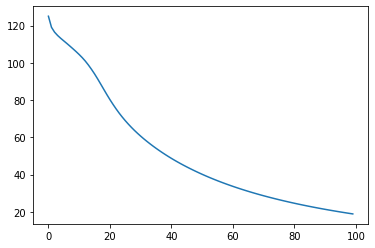

In [3]:
plt.plot(losses)

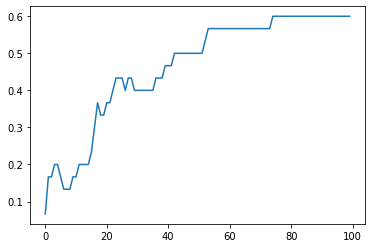

In [4]:
plt.plot(accuracies)

In [5]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [6]:
accuracies

[0.06666666666666667,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.2,
 0.16666666666666666,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.2,
 0.2,
 0.2,
 0.23333333333333334,
 0.3,
 0.36666666666666664,
 0.3333333333333333,
 0.3333333333333333,
 0.36666666666666664,
 0.36666666666666664,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5

In [7]:
losses

[124.97915518964606,
 119.03834721932584,
 116.43953186169932,
 114.63777332347281,
 113.13456852384593,
 111.742810641391,
 110.36626977428766,
 108.94153694123266,
 107.48656088687574,
 106.00112130698841,
 104.4351273394229,
 102.76011534456265,
 100.90451483075952,
 98.80974685719345,
 96.50913750912467,
 94.04992529911544,
 91.3862005609711,
 88.58891268454428,
 85.75722197228704,
 82.9530182637036,
 80.25340503742672,
 77.7028757494682,
 75.28613271091379,
 73.01093289334591,
 70.8979406324937,
 68.92277063852197,
 67.06830734730076,
 65.32267741878009,
 63.672799514116555,
 62.11245128160176,
 60.62933939932144,
 59.21363347056978,
 57.86153022162457,
 56.56257014189052,
 55.31380222883999,
 54.11236023201639,
 52.953430326693976,
 51.83378800020253,
 50.74998776689098,
 49.7044391252035,
 48.693152469645604,
 47.71345686104291,
 46.76869814522645,
 45.854498805673956,
 44.96859778951565,
 44.10803630920677,
 43.272734913955915,
 42.46012015651195,
 41.668223944941936,
 40.89764

In [8]:
acc_cls = [0.06666666666666667,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.2,
 0.16666666666666666,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.2,
 0.2,
 0.2,
 0.23333333333333334,
 0.3,
 0.36666666666666664,
 0.3333333333333333,
 0.3333333333333333,
 0.36666666666666664,
 0.36666666666666664,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6]

In [30]:
acc_qc2 = [0.06666666666666667,
0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.13333333333333333,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.23333333333333334,
 0.23333333333333334,
 0.26666666666666666,
 0.26666666666666666,
 0.3,
 0.3,
 0.3333333333333333,
 0.36666666666666664,
 0.36666666666666664,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6333333333333337,
 0.6333333333333337,
 0.6333333333333337,
 0.6333333333333337,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6666666666666667,
 0.6666666666666667,
 0.6333333333333337,
 0.6333333333333337,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6333333333333337,
 0.6333333333333337,
 0.6333333333333337,
 0.6333333333333337,
 0.6666666666666667,
 0.6666666666666667,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
0.7666666666666667]

In [31]:
acc_qc2

[0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.13333333333333333,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.23333333333333334,
 0.23333333333333334,
 0.26666666666666666,
 0.26666666666666666,
 0.3,
 0.3,
 0.3333333333333333,
 0.36666666666666664,
 0.36666666666666664,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 

In [32]:
lss_cls = [124.97915518964606,
 119.03834721932584,
 116.43953186169932,
 114.63777332347281,
 113.13456852384593,
 111.742810641391,
 110.36626977428766,
 108.94153694123266,
 107.48656088687574,
 106.00112130698841,
 104.4351273394229,
 102.76011534456265,
 100.90451483075952,
 98.80974685719345,
 96.50913750912467,
 94.04992529911544,
 91.3862005609711,
 88.58891268454428,
 85.75722197228704,
 82.9530182637036,
 80.25340503742672,
 77.7028757494682,
 75.28613271091379,
 73.01093289334591,
 70.8979406324937,
 68.92277063852197,
 67.06830734730076,
 65.32267741878009,
 63.672799514116555,
 62.11245128160176,
 60.62933939932144,
 59.21363347056978,
 57.86153022162457,
 56.56257014189052,
 55.31380222883999,
 54.11236023201639,
 52.953430326693976,
 51.83378800020253,
 50.74998776689098,
 49.7044391252035,
 48.693152469645604,
 47.71345686104291,
 46.76869814522645,
 45.854498805673956,
 44.96859778951565,
 44.10803630920677,
 43.272734913955915,
 42.46012015651195,
 41.668223944941936,
 40.89764254290077,
 40.146759548206326,
 39.417664119110796,
 38.708160508373155,
 38.01844362250471,
 37.346956166912705,
 36.692520249119845,
 36.05575850439245,
 35.43531350654168,
 34.830484416036896,
 34.24011744266328,
 33.665013209902696,
 33.10408384594597,
 32.5572368563621,
 32.0235376881015,
 31.50276129162,
 30.994274448302267,
 30.49738354372552,
 30.011644597849838,
 29.538154277996142,
 29.075309584809197,
 28.622763222928832,
 28.18095609436044,
 27.748408036381676,
 27.325223228096792,
 26.911787209990425,
 26.506647958666726,
 26.11053593540546,
 25.722865359079215,
 25.34219501759249,
 24.969140006034788,
 24.603887147818845,
 24.246072961378726,
 23.894521825544338,
 23.551011323550235,
 23.21449052418711,
 22.884745524348276,
 22.561480751837678,
 22.24473134531808,
 21.933616283659724,
 21.628378087895044,
 21.329776422826967,
 21.0360986039759,
 20.74840843023308,
 20.465634949327967,
 20.188466512529928,
 19.915679578335922,
 19.64832706983706,
 19.38566839675783,
 19.12789824174667,
 18.874608690545088]

In [45]:
lss_qc2 =[116.17819432,
115.25100348,
        114.98075696,
        114.68003591,
        114.53556197,
        114.37498502,
        113.97586053,
        113.76242842,
        113.43496188,
        113.11493668,
        112.80572719,
        112.36398278,
        111.93848197,
        111.40110109,
        110.78144605,
        110.06164674,
        109.2312722 ,
        108.26066875,
        106.96357548,
        105.44770111,
        103.51161553,
        101.31508326,
         98.52826392,
         95.18909323,
         91.12962088,
         86.08282252,
         79.80251502,
         72.513743  ,
         64.21130599,
         55.47205157,
         46.83846553,
         38.74312835,
         31.40156707,
         25.01731632,
         19.65731469,
         15.28288236,
         11.75532061,
          9.00325919,
          6.95642128,
          5.961212723534897,
 5.770458959723387,
 5.588113908326929,
 5.48475885,
 5.4129813122254,
 5.245399890075436,
 5.084220325556641,
    4.929775726729228,
 4.781016550559829,
 4.638435718532975,
 4.501087334206739,
 4.42769697,
 4.3691339233201605,
 4.2418844965452,
 4.119538155389442,
 4.001460138100802,
 3.8878260454116647,
 3.778056861287809,
 3.672296963296333,
  3.65681392,
 3.5700894854863527,
 3.471520566463186,
 3.3762071008670262,
 3.2841960933083536,
 3.195181749688663,
 3.1091719248596337,
 3.08186576,
 3.07186576,
 3.0259246352241007,
 2.945419075527737,
 2.8674621564323095,
 2.7919865522782157,
 2.718915481224227,
 2.6480424528010875,
 2.5794993586753803,
 2.5129665418057825,
 2.448553492944943,
 2.386018893635945,
 2.3252658031784983,
 2.2664556139263397,
 2.209403865986586,
 2.1540285781410367,
          2.64291177,
          2.30032129,
          2.02735246,
          1.80602707,
          1.62375415,
          1.47152153,
          1.34303497,
          1.23328082,
          1.13852449,
          1.05601558,
          0.9836185 ,
          0.91965857,
          0.86280009,
          0.81196685,
          0.76628505,
          0.7250452 ,
          0.68765545,
          0.68664342,
          0.67895732]

In [46]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

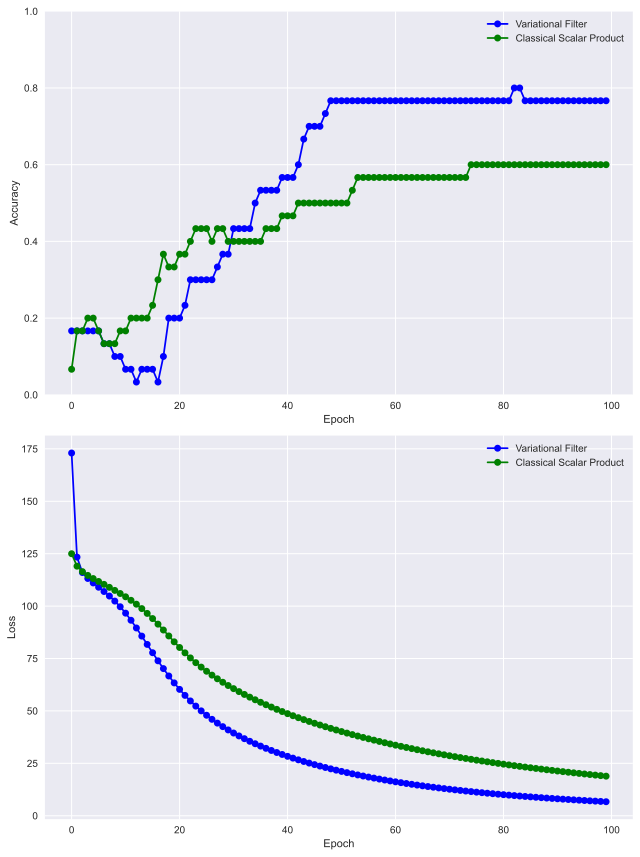

In [47]:
plt.style.use("seaborn")
#plt.figure(dpi=450)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))
ax1.plot(acc_qc, "-ob", label="Variational Filter")
ax1.plot(acc_cls, "-og", label="Classical Scalar Product")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()
ax2.plot(lss_qc, "-ob", label="Variational Filter")
ax2.plot(lss_cls, "-og", label="Classical Scalar Product")
ax2.set_ylabel("Loss")
#ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.savefig("QF_2x2_50.png")
plt.show()

In [48]:
acc_fMnist_cls = [0.06666666666666667,
 0.13333333333333333,
 0.13333333333333333,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.23333333333333334,
 0.26666666666666666,
 0.3,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4666666666666667,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667,
 0.5333333333333333,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6333333333333333,
 0.6,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5333333333333333]

In [49]:
lss_fMnist_cls = [269.1679061472456,
 159.2779214139207,
 120.0204757430763,
 104.9709137023599,
 94.23862227459699,
 85.82347865083922,
 78.90702979253768,
 73.08421056403799,
 68.09496540477222,
 63.74712864005311,
 59.89699997450452,
 56.43787139434228,
 53.29007529042925,
 50.39348669626601,
 47.70233810561438,
 45.181576722351394,
 42.80422417951835,
 40.54946134059487,
 38.4012832658028,
 36.34761674760874,
 34.379809555444886,
 32.492407170556234,
 30.68310360809919,
 28.952673945923696,
 27.304568133791314,
 25.743791602302018,
 24.274975466399802,
 22.900241223496074,
 21.618003803263573,
 20.423353515701255,
 19.309484837321364,
 18.269146324475237,
 17.295526058761133,
 16.382582207342093,
 15.525053089664716,
 14.718349350505592,
 13.958432468232578,
 13.241717228087653,
 12.565003703950133,
 11.925428927479182,
 11.320429196811386,
 10.74770791422683,
 10.205203959462276,
 9.6910607200606,
 9.203595762091338,
 8.741273688667805,
 8.302681435458355,
 7.886508615841811,
 7.4915316578275,
 7.1166022810436775,
 6.760640057867078,
 6.422626820198047,
 6.101603551439657,
 5.79666785523463,
 5.506972716722264,
 5.231724035761944,
 4.970178484790273,
 4.721641653755935,
 4.48546474841674,
 4.261041191710136,
 4.047803226651018,
 3.845218973665871,
 3.6527881008708927,
 3.4700391003072792,
 3.2965252437752963,
 3.1318228274167224,
 2.9755278949120103,
 2.827254235537571,
 2.6866313780434057,
 2.5533034262747996,
 2.426927390744891,
 2.307172693528995,
 2.1937202122344224,
 2.086261436409347,
 1.9844986307506116,
 1.8881450243558375,
 1.7969236628529752,
 1.7105680819331488,
 1.628822211677158,
 1.5514404194332987,
 1.4781870112525632,
 1.4088368804269875,
 1.3431750298565512,
 1.280996728396729,
 1.222107047559667,
 1.1663208365461708,
 1.1134625177476907,
 1.063365831182582,
 1.015873457507239,
 0.9708368300837619,
 0.9281156544502387,
 0.8875775997620631,
 0.8490983344948406,
 0.8125602235105885,
 0.7778530932844799,
 0.7448729579584329,
 0.7135222484470344,
 0.6837092218657823,
 0.6553477194404961,
 0.628356706304447]

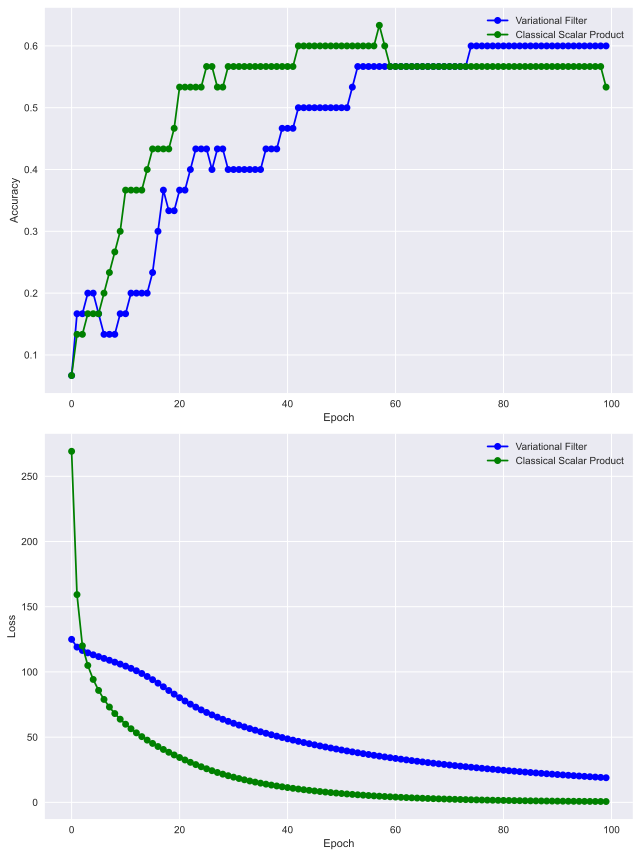

In [50]:
plt.style.use("seaborn")
#plt.figure(dpi=450)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))
ax1.plot(accuracies, "-ob", label="Variational Filter")
ax1.plot(acc_fMnist_cls, "-og", label="Classical Scalar Product")
ax1.set_ylabel("Accuracy")
#ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()
ax2.plot(losses, "-ob", label="Variational Filter")
ax2.plot(lss_fMnist_cls, "-og", label="Classical Scalar Product")
ax2.set_ylabel("Loss")
#ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

In [51]:
acc_fix = [0.06666666666666667,
 0.03333333333333333,
 0.1,
 0.1,
 0.1,
 0.1,
 0.13333333333333333,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.4,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.6,
 0.6,
 0.6,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

In [52]:
lss_fix = [204.35107453663073,
 143.47985335948184,
 127.12128912367791,
 117.14218894164053,
 110.80843934853692,
 105.00811816148939,
 99.40430366998673,
 94.11101536002772,
 89.1264836728919,
 84.44339880564837,
 80.05269932919563,
 75.94229988552458,
 72.0974949531298,
 68.50184869979573,
 65.13814505508924,
 61.989185602773425,
 59.03835906518137,
 56.26999001290791,
 53.66951319394239,
 51.22352889166268,
 48.9197876142591,
 46.74713900124214,
 44.695466240376845,
 42.755616645021775,
 40.91933225569895,
 39.179180936526,
 37.52848737807034,
 35.961263610514976,
 34.47213926584059,
 33.056292435406036,
 31.70938235228018,
 30.427485254547086,
 29.207034702022305,
 28.044767391304482,
 26.937675205275543,
 25.882963893043073,
 24.87801844262413,
 23.92037490904076,
 23.007698214147876,
 22.137765252957568,
 21.308452528536602,
 20.517727491017315,
 19.763642767543196,
 19.04433252695278,
 18.358010311853157,
 17.702967777802662,
 17.07757389260314,
 16.480274258716353,
 15.909590321855033,
 15.364118314843479,
 14.842527856090134,
 14.343560176426658,
 13.866025987756284,
 13.408803033771905,
 12.970833379129948,
 12.551120501130711,
 12.148726249261381,
 11.762767734764887,
 11.3924142062615,
 11.036883959629492,
 10.695441321807746,
 10.36739373962531,
 10.052088996679368,
 9.74891257398594,
 9.457285163789873,
 9.176660340611091,
 8.906522389311766,
 8.646384286639414,
 8.39578583023377,
 8.154291907376296,
 7.921490894685785,
 7.69699317940992,
 7.480429792816591,
 7.271451146354822,
 7.069725861642435,
 6.874939685878269,
 6.686794484903941,
 6.505007306815574,
 6.329309509701924,
 6.159445947750416,
 5.995174210581797,
 5.836263911251771,
 5.682496018878224,
 5.5336622323161855,
 5.389564391712428,
 5.250013925127702,
 5.114831327723234,
 4.983845671272446,
 4.856894141986128,
 4.73382160483215,
 4.614480192696716,
 4.498728918874482,
 4.386433311496885,
 4.277465068611544,
 4.171701732717826,
 4.069026383642269,
 3.969327348708937,
 3.8724979292228787,
 3.7784361423423656,
 3.6870444774677003]

In [53]:
acc_qc = [0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.13333333333333333,
 0.13333333333333333,
 0.1,
 0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.1,
 0.2,
 0.2,
 0.2,
 0.23333333333333334,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3333333333333333,
 0.36666666666666664,
 0.36666666666666664,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.5,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5666666666666667,
 0.5666666666666667,
 0.5666666666666667,
 0.6,
 0.6666666666666666,
 0.7,
 0.7,
 0.7,
 0.7333333333333333,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
0.8,
0.8,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667]

In [54]:
lss_qc = [173.01808100533765,
 123.36640580846338,
 116.00015347599786,
 113.17054986379351,
 111.04175163185532,
 108.99743852262785,
 106.95411803662117,
 104.7885976689648,
 102.3913411643578,
 99.68457373481931,
 96.63056179174554,
 93.23770760336812,
 89.55983767492188,
 85.68539253491035,
 81.71893099476196,
 77.76167590991591,
 73.89748061110967,
 70.18691699480092,
 66.66824144852824,
 63.36190828131314,
 60.27558326340545,
 57.408132860099926,
 54.752382837004646,
 52.29701086958069,
 50.02796581903657,
 47.92963878256405,
 45.98585798670958,
 44.18070346367491,
 42.49912250665821,
 40.92734053030886,
 39.45308196273027,
 38.065632137737936,
 36.755780393928134,
 35.51568628956829,
 34.338706359687635,
 33.219210571945204,
 32.152408157908695,
 31.134193825182383,
 30.16101862341554,
 29.229785247216444,
 28.337765060750158,
 27.482533116934952,
 26.661917382143713,
 25.87395882051898,
 25.116879628549142,
 24.38905755303183,
 23.68900478109821,
 23.015350328372694,
 22.366825173667813,
 21.74224961436684,
 21.140522468382578,
 20.560611847160438,
 20.00154728655921,
 19.462413061305945,
 18.942342533090436,
 18.440513398361098,
 17.95614371348341,
 17.488488584549224,
 17.036837418198015,
 16.600511638978958,
 16.178862788291116,
 15.771270929715987,
 15.377143295409525,
 14.995913117890206,
 14.627038600793266,
 14.27000199073701,
 13.9243087202207,
 13.58948659833114,
 13.265085031948832,
 12.95067426512083,
 12.645844628341463,
 12.350205792749959,
 12.063386026774953,
 11.785031454655975,
 11.514805317627479,
 11.252387239467641,
 10.997472498676714,
 10.749771309828127,
 10.509008116712415,
 10.274920899806418,
 10.0472605004128,
 9.825789963553458,
 9.610283901401456,
 9.40052787871771,
 9.196317821442445,
 8.997459449283127,
 8.803767732857724,
 8.615066375687439,
 8.431187321101554,
 8.251970283910339,
 8.077262306527132,
 7.9069173390682055,
 7.740795842836992,
 7.578764416497076,
 7.420695444159487,
 7.266466764546689,
 7.115961360354216,
 6.969067066898475,
 6.825676299123688,
 6.685685796033212]

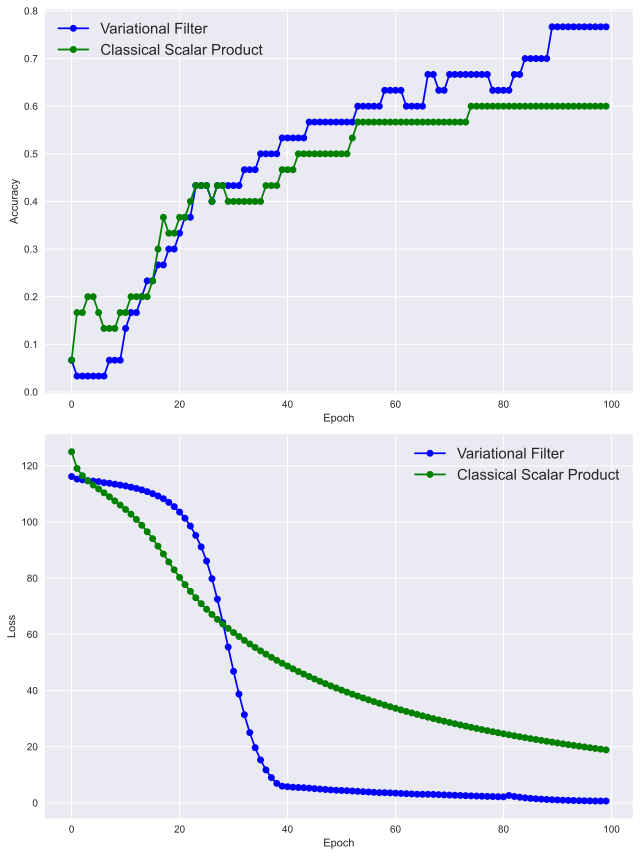

In [60]:
plt.style.use("seaborn")
#plt.figure(dpi=450)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))
ax1.plot(acc_qc2, "-ob", label="Variational Filter")
ax1.plot(acc_cls, "-og", label="Classical Scalar Product")

#ax1.plot(acc_fMnist_cls, "-og", label="Classical Scalar Product")
#ax1.plot(acc_fix, "-or", label="Fixed QFilter")
ax1.set_ylabel("Accuracy")
#ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend(fontsize=15)
ax2.plot(lss_qc2, "-ob", label="Variational Filter")
ax2.plot(lss_cls, "-og", label="Classical Scalar Product")

#ax2.plot(lss_fMnist_cls, "-og", label="Classical Scalar Product")
#ax2.plot(lss_fix, "-or", label="Fixed QFilter")
ax2.set_ylabel("Loss")
#ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend(fontsize=15)
plt.tight_layout()
plt.savefig("QF_2x2_2_100.png")

plt.show()